<p><center><h1><b>Geo-spatial Data Analysis</b></h1></center></p>

<br><p><h4> <b>Introduction</b> </h4></p>

The Modern-Era Retrospective analysis for Research and Applications, Version 2 (MERRA-2) dataset, introduced in 1980, represents a significant leap forward in meteorological assimilation, integrating modern observational data including hyperspectral radiance, microwave observations, and GPS-Radio Occultation datasets. 

This project focuses on October 19, 2005, during Hurricane Wilma, utilizing MERRA-2's extensive dataset. It aims to extract insights from MERRA-2's vast dataset, leveraging NetCDF format files to analyze geospatial data with its multi-dimensional variables. This approach enables detailed exploration of Hurricane Wilma's impact through spatial and temporal dimensions.

<br><p><h4> <b>Global Surface and Sea Level Pressure Evolution</b> </h4></p>

Plot the surface pressure (PS) and sea level pressure (SLP) for each of the 8 3-hour time periods across the world region. You can use subplots.

In [2]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import imageio
import warnings
from IPython.display import Image

# Ignore warnings
warnings.filterwarnings('ignore')

In [4]:
# Open the NetCDF file for MERRA-2 data
with Dataset("Merra2_data.nc4") as NetCDFFile:
    # Extract longitude, latitude, and level data along with their respective sizes
    lons = NetCDFFile.variables['lon'][:]; Nlons = np.size(lons)
    lats = NetCDFFile.variables['lat'][:]; Nlats = np.size(lats)
    levs = NetCDFFile.variables['lev'][:]; Nlevs = np.size(levs)
    
    # Extract raw time data and determine the number of time steps
    raw_times = NetCDFFile.variables['time'][:]; Ntimes = np.size(raw_times)
    
    # Define 2D and 3D variables of interest along with their sizes
    ncVar2D = ['SLP','PS']; NVars2D = np.size(ncVar2D)
    ncVar3D = ['T','U','V','RH']; NVars3D = np.size(ncVar3D)
    
    # Initialize arrays to store the extracted data
    myvars2D = np.full((Ntimes, Nlats, Nlons, NVars2D), np.nan)
    myvars3D = np.full((Ntimes, Nlevs, Nlats, Nlons, NVars3D), np.nan)
    
    # Extract and store 2D variables
    for i, elem in enumerate(ncVar2D):
        myvars2D[...,i] = NetCDFFile.variables[elem][:]
        
    # Extract and store 3D variables
    for i, elem in enumerate(ncVar3D):
        myvars3D[...,i] = NetCDFFile.variables[elem][:]
     
    # Handle missing values incorrectly defined as 10^10 by replacing them with NaN  
    myvars3D = np.where(myvars3D < 10**10, myvars3D, np.nan)

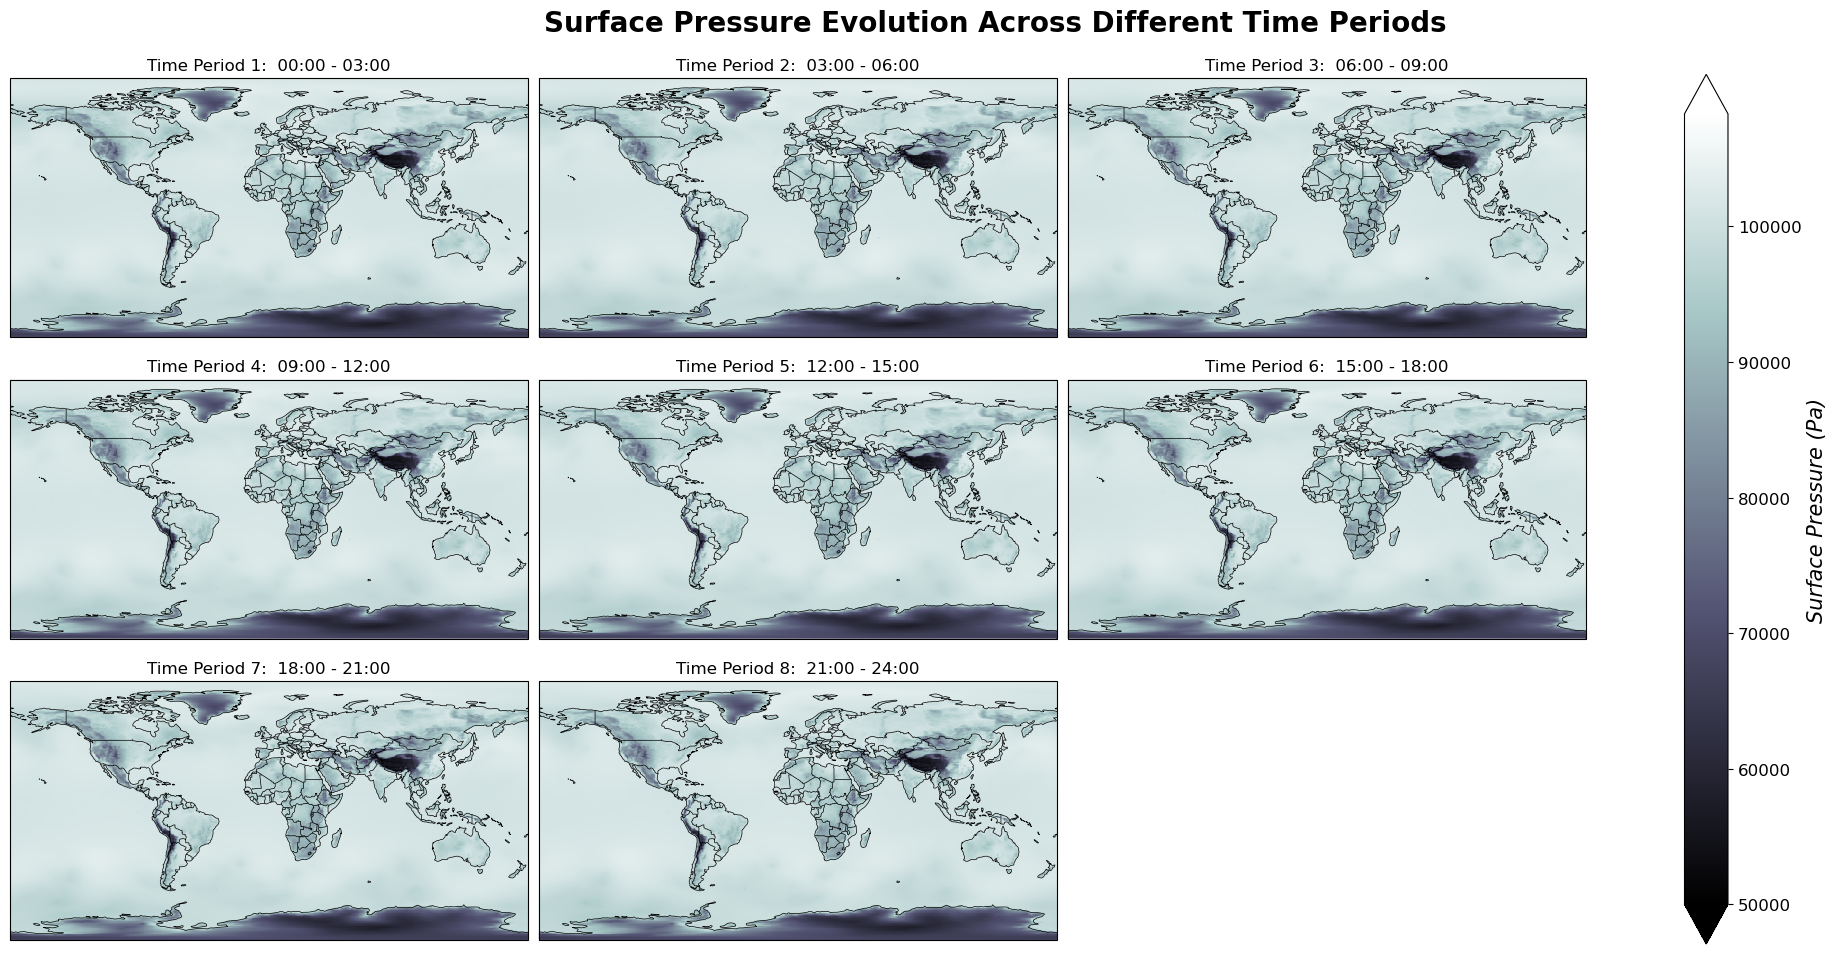

In [329]:
# Define minimum and maximum surface pressure in pascals
min_ps = 50000
max_ps = 108300

# Define index of surface pressure and time intervals
jvar = 1 
time_intervals = [(f"{i:02d}:00 - {i+3:02d}:00") for i in range(0, 24, 3)]

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()}, )

# Iterate to plot subplots varying with time index (jt)
for jt, ax in enumerate(axes.flat):
    if jt < 8:  # Only plot if within the valid time periods
        # Add geographical features
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

        # Define normalization and colormap
        mynorm = plt.Normalize(vmin = min_ps, vmax = max_ps)
        mycmap = plt.get_cmap('bone', 1000)

        # Plot surface pressure data
        cax = ax.pcolormesh(lons,lats,myvars2D[jt,:,:,jvar],cmap=mycmap,transform=ccrs.PlateCarree(),norm=mynorm)
        
        # Set title with the value of jt
        ax.set_title(f"Time Period {jt+1}:  {time_intervals[jt]}", fontsize=12)
    else:
        # Hide empty subplot
        ax.set_visible(False)

# Adjust plot layout with additional space after suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add colorbar
cbar = fig.colorbar(cax, ax=axes.ravel().tolist(), orientation='vertical', pad=0.05, extend='both')
cbar.set_label('Surface Pressure (Pa)', fontstyle='italic', fontsize=15)
cbar.ax.tick_params(labelsize=12)

# Set plot features and display
fig.suptitle('Surface Pressure Evolution Across Different Time Periods', fontweight='bold', fontsize=20)
plt.show()

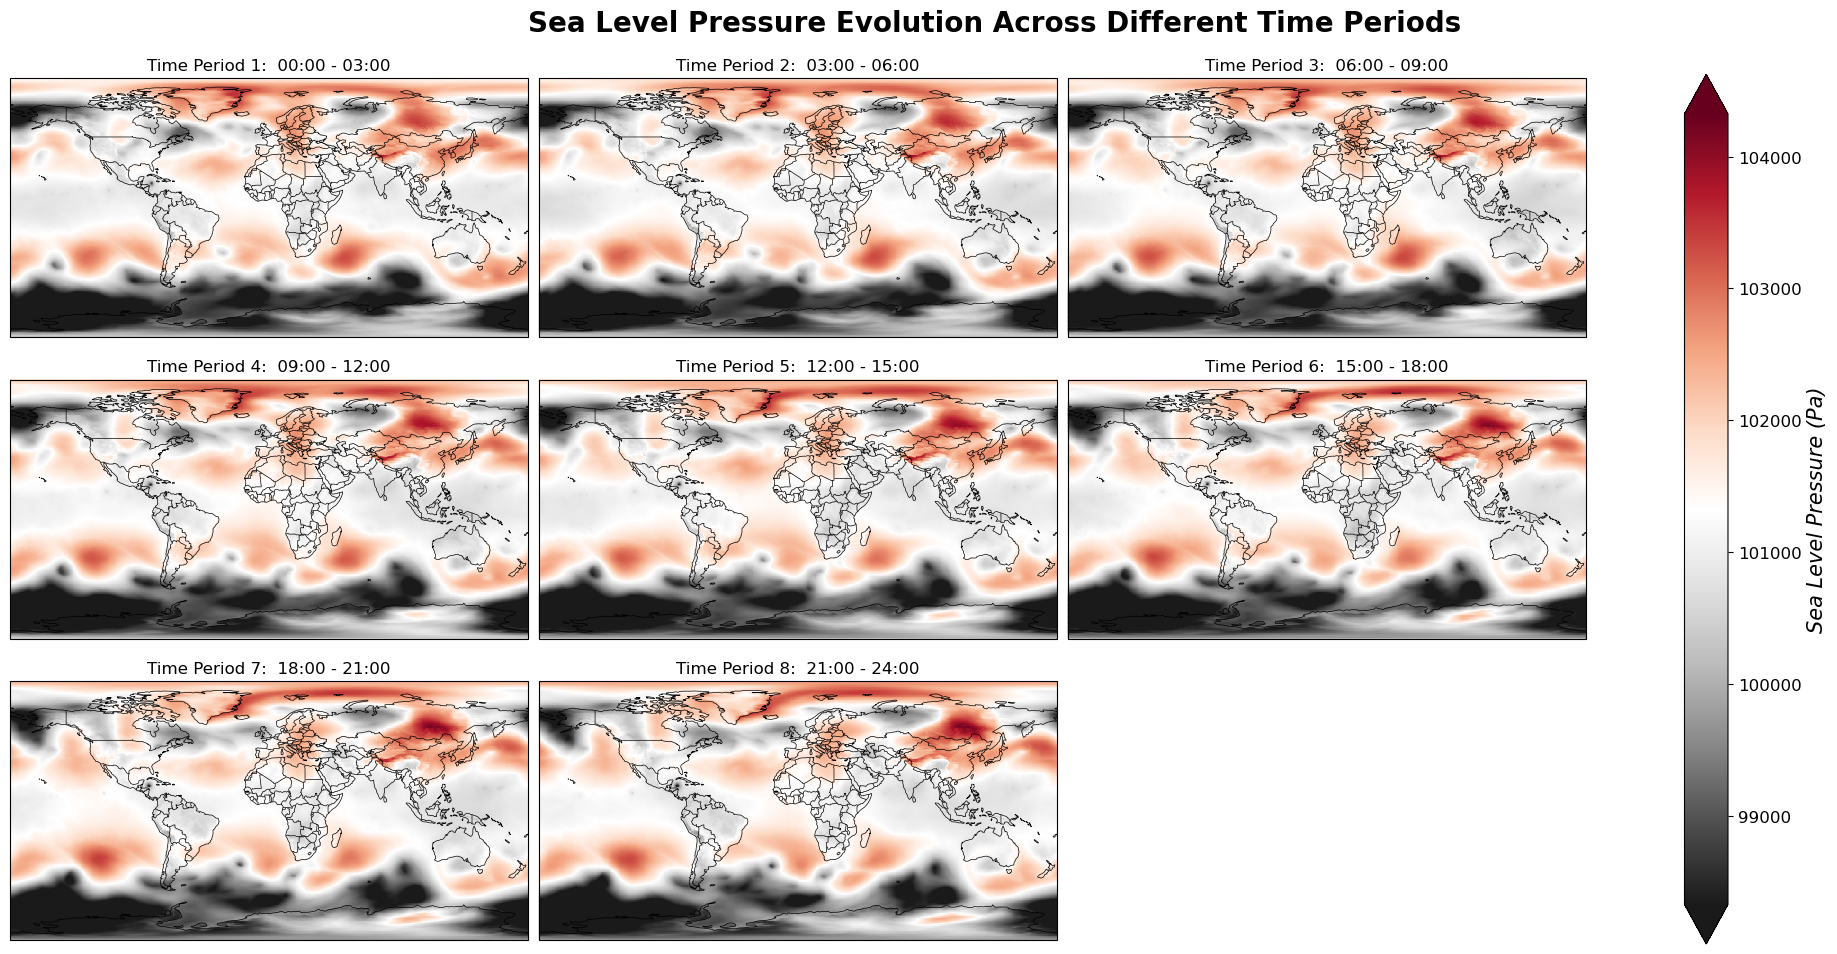

In [258]:
# Define average sea level pressure and its deviation in pascals
average_ps = 101325
dp = 3000

# Define index of sea level pressure and time intervals
jvar = 0 
time_intervals = [(f"{i:02d}:00 - {i+3:02d}:00") for i in range(0, 24, 3)]

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()}, )

# Iterate to plot subplots varying with time index (jt)
for jt, ax in enumerate(axes.flat):
    if jt < 8:  # Only plot if within the valid time periods
        # Add geographical features
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

        # Define normalization and colormap
        mynorm = plt.Normalize(vmin = average_ps - dp, vmax = average_ps + dp)
        mycmap = plt.get_cmap('RdGy_r', 1000) 

        # Plot surface pressure data
        cax = ax.pcolormesh(lons,lats,myvars2D[jt,:,:,jvar],cmap=mycmap,transform=ccrs.PlateCarree(),norm=mynorm)
        
        # Set title with the value of jt
        ax.set_title(f"Time Period {jt+1}:  {time_intervals[jt]}", fontsize=12)
    else:
        # Hide empty subplot
        ax.set_visible(False)

# Adjust plot layout with additional space after suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add colorbar
cbar = fig.colorbar(cax, ax=axes.ravel().tolist(), orientation='vertical', pad=0.05, extend='both')
cbar.set_label('Sea Level Pressure (Pa)', fontstyle='italic', fontsize=15)
cbar.ax.tick_params(labelsize=12)

# Set plot features and display
fig.suptitle('Sea Level Pressure Evolution Across Different Time Periods', fontweight='bold', fontsize=20)
plt.show()

<br><p><h4> <b>Jet Stream at 300 hPa Across the Globe</b> </h4></p>

Make a graph showing the jet stream at 300 hPa height for each of the 8 3-hour time periods around the world.

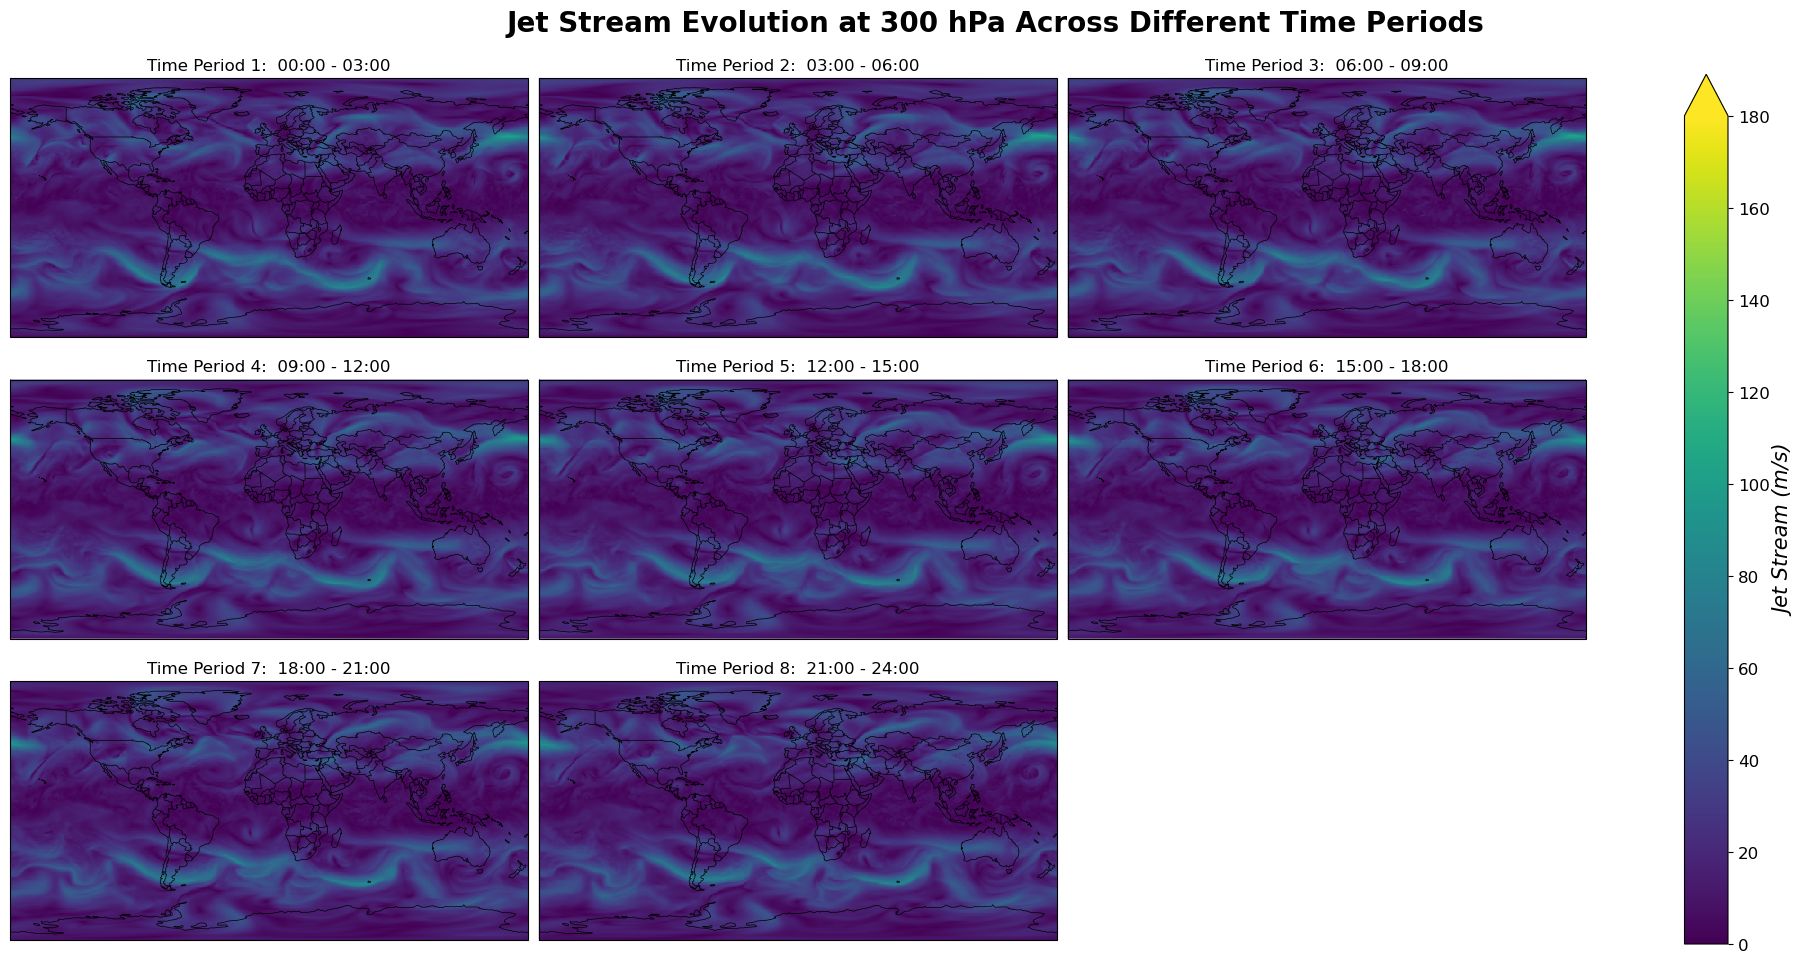

In [5]:
# Define the variable and level index corresponding to the 300 hPa level
jvar_u = 1  # Index of the U component of wind
jvar_v = 2  # Index of the V component of wind
level_jet = np.abs(levs - 300).argmin()

# Define minimum and maximum jet stream in km/h
min_js = 0
max_js = 180

# Define the 8 time intervals
time_intervals = [(f"{i:02d}:00 - {i+3:02d}:00") for i in range(0, 24, 3)]

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Iterate to plot subplots varying with time index (jt)
for jt, ax in enumerate(axes.flat):
    if jt < 8:  # Only plot if within the valid time periods
        # Add geographical features
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

        # Define normalization and colormap
        mynorm = plt.Normalize(vmin = min_js, vmax = max_js)
        mycmap = plt.get_cmap('viridis', 1000) 
        
        # Calculate the magnitude of the jet stream speed using the U and V components
        jet_stream = np.sqrt(myvars3D[jt, level_jet, :, :, jvar_u]**2 + myvars3D[jt, level_jet, :, :, jvar_v]**2)
        
        # Extract and plot jet stream data at 300 hPa
        cax = ax.pcolormesh(lons, lats, jet_stream, cmap=mycmap, transform=ccrs.PlateCarree(),norm=mynorm) 
        
        # Set title with the value of jt
        ax.set_title(f"Time Period {jt+1}:  {time_intervals[jt]}", fontsize=12)
    else:
        # Hide empty subplot
        ax.set_visible(False)

# Adjust plot layout with additional space after suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add colorbar
cbar = fig.colorbar(cax, ax=axes.ravel().tolist(), orientation='vertical', pad=0.05, extend='max')
cbar.set_label('Jet Stream (m/s)', fontstyle='italic', fontsize=15)
cbar.ax.tick_params(labelsize=12)

# Set plot features and display
fig.suptitle('Jet Stream Evolution at 300 hPa Across Different Time Periods', fontweight='bold', fontsize=20)
plt.show()

<br><p><h4> <b>Hurricane Wilma's Evolution</b> </h4></p>

Graph the evolution of Hurricane Wilma throughout the day. For this, you will 'zoom' to the Caribbean area. Do it with 2 fields: SLP and relative humidity. For relative humidity, use 800 hPa elevation.

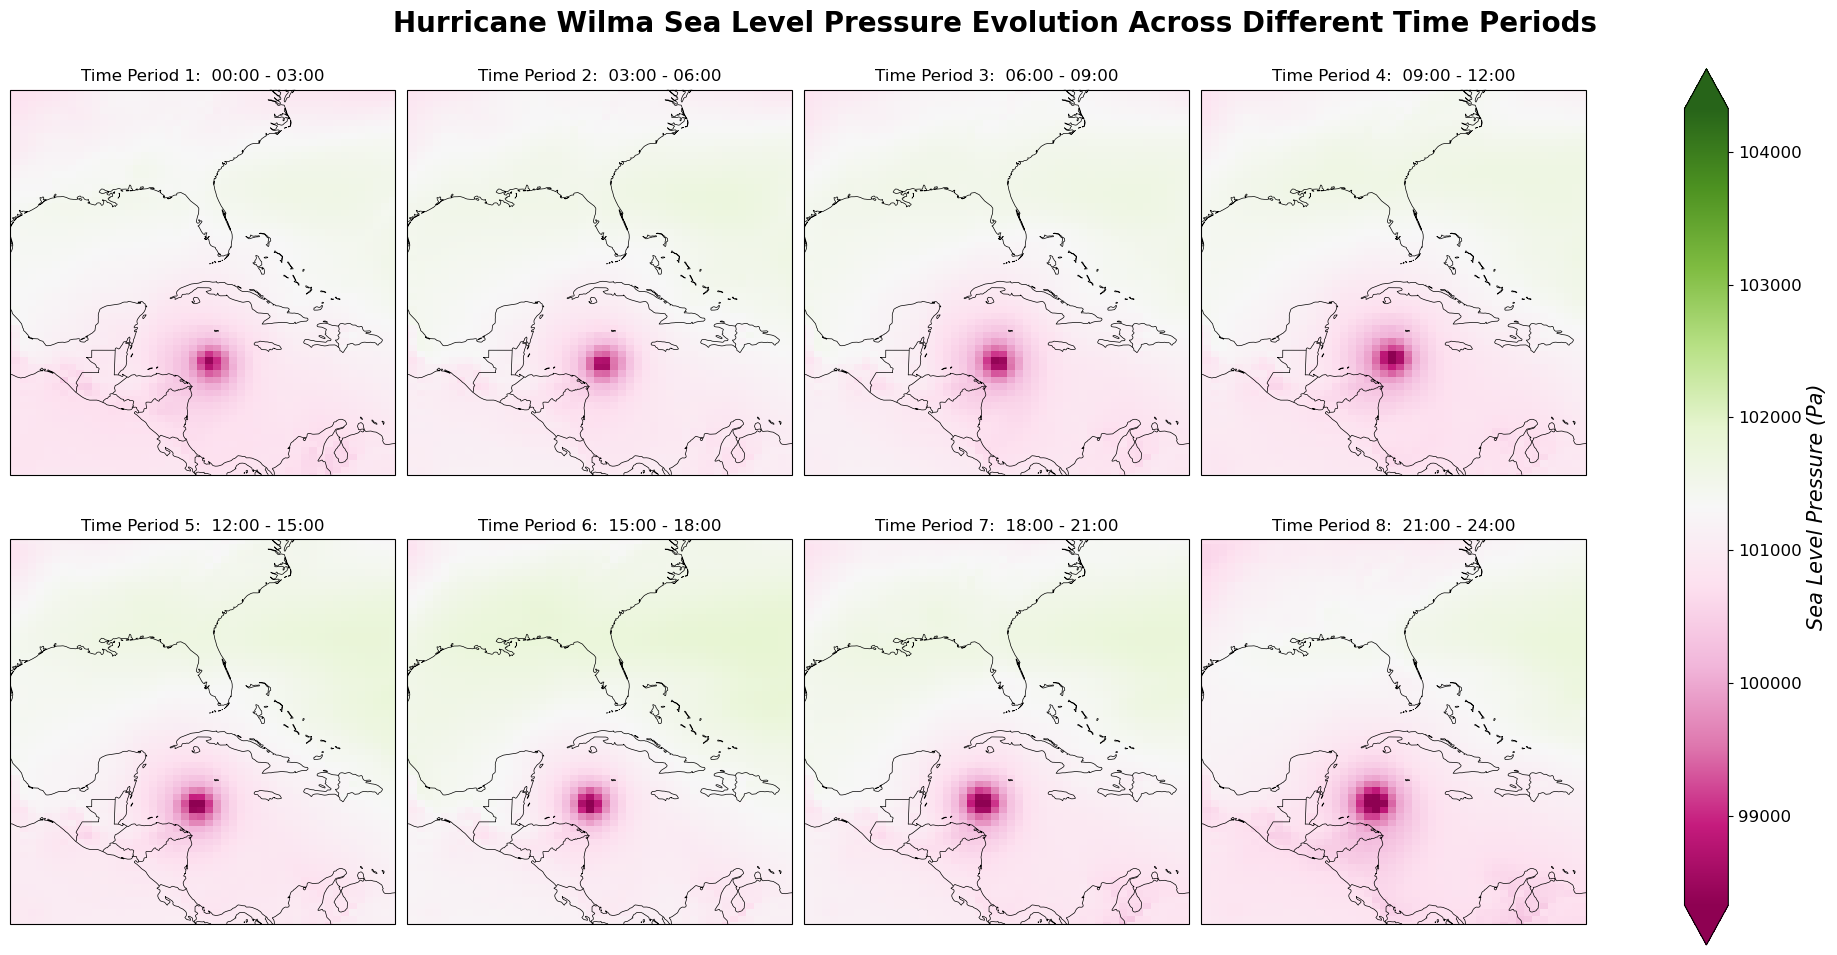

In [164]:
# Define average sea level pressure and its deviation in pascals
average_ps = 101325
dp = 3000

# Define the coordinates of La Habana, Cuba, and the extent of the region around it
hab_lat = 23.11
hab_lon = -82.36
dx = 15

# Define the 8 time intervals and variable index
time_intervals = [(f"{i:02d}:00 - {i+3:02d}:00") for i in range(0, 24, 3)]
jvar = 0

# Create figure and axes
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
        
# Iterate to plot subplots varying with time index (jt)
for jt, ax in enumerate(axes.flat):
    # Add geographical features
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    
    # Set the geographical extent of the subplot to focus on the area around La Habana
    ax.set_extent([hab_lon - dx, hab_lon + dx, hab_lat - dx, hab_lat + dx], crs=ccrs.PlateCarree())

    # Define normalization and colormap
    mynorm = plt.Normalize(vmin = average_ps - dp, vmax = average_ps + dp)
    mycmap = plt.get_cmap('PiYG', 1000) 

    # Plot surface pressure data
    cax = ax.pcolormesh(lons,lats,myvars2D[jt,:,:,jvar],cmap=mycmap,transform=ccrs.PlateCarree(),norm=mynorm)
    
    # Set title with the value of jt
    ax.set_title(f"Time Period {jt+1}:  {time_intervals[jt]}", fontsize=12)


# Adjust plot layout with additional space after suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add colorbar
cbar = fig.colorbar(cax, ax=axes.ravel().tolist(), orientation='vertical', pad=0.05, extend='both')
cbar.set_label('Sea Level Pressure (Pa)', fontstyle='italic', fontsize=15)
cbar.ax.tick_params(labelsize=12)

# Set plot features and display
fig.suptitle('Hurricane Wilma Sea Level Pressure Evolution Across Different Time Periods', fontweight='bold', fontsize=20)
plt.show()

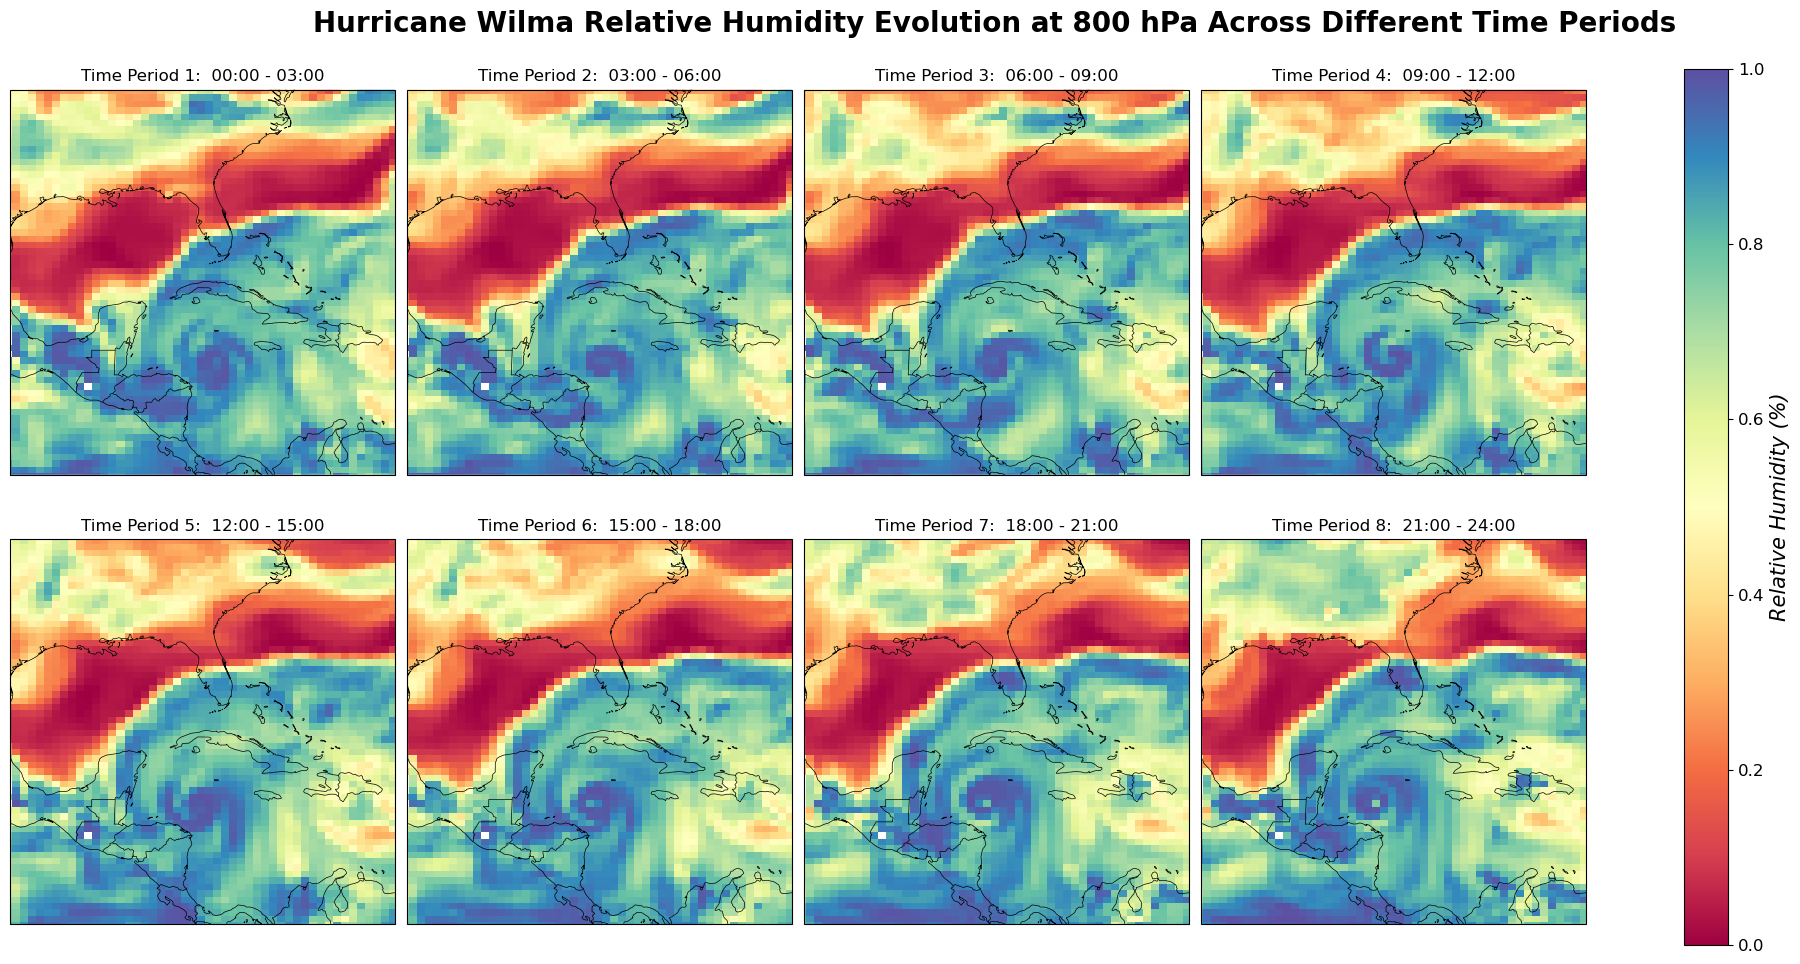

In [209]:
# Define the coordinates of La Habana, Cuba, and the extent of the region around it
hab_lat = 23.11
hab_lon = -82.36
dx = 15

# Define the 8 time intervals and variables index
time_intervals = [(f"{i:02d}:00 - {i+3:02d}:00") for i in range(0, 24, 3)]
jvar = 3  # Index corresponding to relative humidity in ncVar3D array
level_index_800hPa = np.abs(levs - 800).argmin() # Index corresponding to 800 hPa elevation in levs array

# Create figure and axes
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
        
# Iterate to plot subplots varying with time index (jt)
for jt, ax in enumerate(axes.flat):
    # Add geographical features
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    
    # Set the geographical extent of the subplot to focus on the area around La Habana
    ax.set_extent([hab_lon - dx, hab_lon + dx, hab_lat - dx, hab_lat + dx], crs=ccrs.PlateCarree())

    # Define normalization and colormap
    mynorm = plt.Normalize(vmin=0, vmax=1)  # Assuming relative humidity ranges from 0 to 1
    mycmap = plt.get_cmap('Spectral', 1000) 

    # Plot relative humidity data at 800 hPa elevation
    cax = ax.pcolormesh(lons, lats, myvars3D[jt,level_index_800hPa,:,:,jvar], cmap=mycmap, transform=ccrs.PlateCarree(), norm=mynorm)
    
    # Set title for the subplot indicating the time period
    ax.set_title(f"Time Period {jt+1}:  {time_intervals[jt]}", fontsize=12)

# Adjust plot layout with additional space after suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add colorbar to the subplots
cbar = fig.colorbar(cax, ax=axes.ravel().tolist(), orientation='vertical', pad=0.05)
cbar.set_label('Relative Humidity (%)', fontstyle='italic', fontsize=15)
cbar.ax.tick_params(labelsize=12)

# Set suptitle for the entire plot
fig.suptitle('Hurricane Wilma Relative Humidity Evolution at 800 hPa Across Different Time Periods', fontweight='bold', fontsize=20)

# Display the plot
plt.show()

<br><p><h4> <b>Mexico City Temperature Variation</b> </h4></p>

Investigate the coordinates of Mexico City. Find the nearest mesh point. Graph the evolution of temperature throughout the day for the surface (the first vertical level where there is valid data).

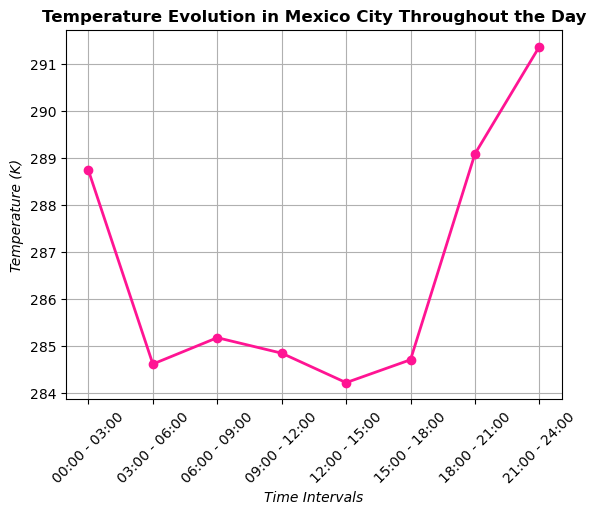

In [192]:
# Define the coordinates of Mexico City, México
cdmx_lat = np.abs(lats - 19.433).argmin() # Index corresponding to nearest latitude value
cdmx_lon = np.abs(lons - (-99.133)).argmin() # Index corresponding to nearest longitude value

# Define the 8 time intervals and variables index
time_intervals = [(f"{i:02d}:00 - {i+3:02d}:00") for i in range(0, 24, 3)]
jvar = 0  # Index corresponding to temperature in ncVar3D array
level_temperature = np.isnan(myvars3D[:,:,cdmx_lat,cdmx_lon,jvar]).argmin() # Index corresponding to first valid data

# Extract temperature data for Mexico City at each time interval
T = [myvars3D[jt, level_temperature, cdmx_lat, cdmx_lon, jvar] for jt in range(8)]

# Plot temperature evolution
plt.plot(range(8), T, marker='o', color='deeppink', linewidth=2)
plt.xticks(range(8), time_intervals, rotation=45)  # Label x-axis with time intervals
plt.xlabel('Time Intervals', fontstyle='italic')
plt.ylabel('Temperature (K)', fontstyle='italic')
plt.title('Temperature Evolution in Mexico City Throughout the Day', fontweight='bold')
plt.grid(True)
plt.show()


<br><p><h4> <b>City Temperatures Profiles: London, New York, Sydney, Mérida</b> </h4></p>

Find the coordinates of the following cities: London, New York, Sydney, Mérida. For each location, plot the temperature profile from the surface to the 'top' of the atmosphere, and show the profiles for each of the 8 3-hour time periods.

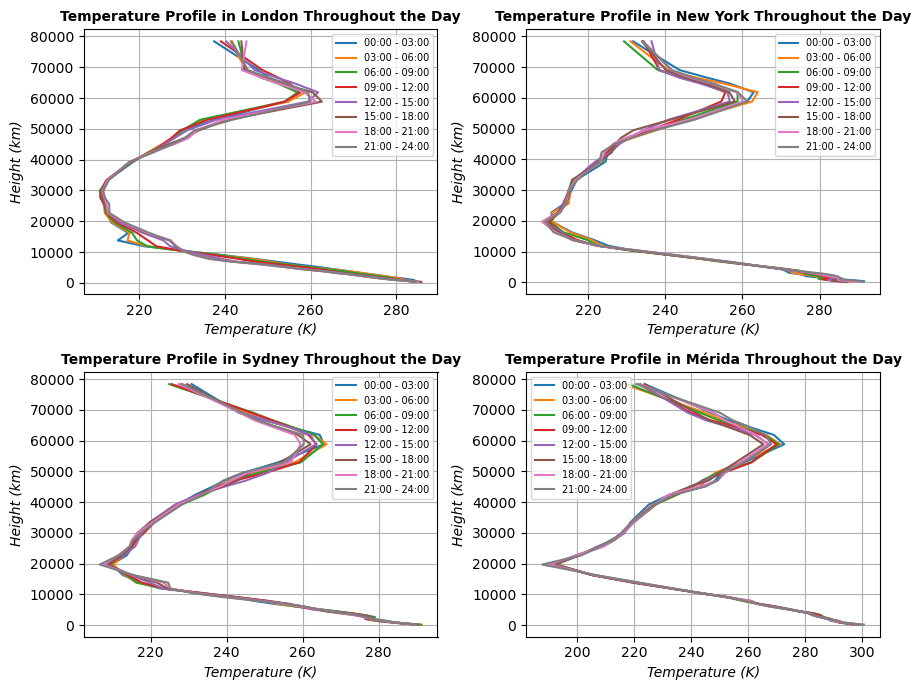

In [4]:
# Dictionary containing city coordinates
cities = {'London': (51.5099, -0.118), 'New York': (40.731, -73.935), 'Sydney': (-33.865, 151.21), 'Mérida': (20.967, -89.593)}

# Define the 8 time intervals and variables index
time_intervals = [(f"{i:02d}:00 - {i+3:02d}:00") for i in range(0, 24, 3)]
jvar = 0  # Index corresponding to temperature in ncVar3D array

# Convert pressure levels to heights in kilometers
heights = -8500 * np.log(levs / 1013)

# Create subplots for each city
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))

# Iterate to plot each city
for (city, coords), ax in zip(cities.items(), axes.flat):
    # Extract latitude and longitude of the city
    city_lat = np.abs(lats - coords[0]).argmin()
    city_lon = np.abs(lons - coords[1]).argmin()

    # Extract temperature data for the city at each time interval
    T = [myvars3D[jt, :, city_lat, city_lon, jvar] for jt in range(8)]

    # Transpose the temperature data array
    T = np.array(T).T

    # Plot temperature evolution for each time period
    for jt in range(8):
        ax.plot(T[:, jt], heights, label=f"{time_intervals[jt]}")
    
    # Set subplot title
    ax.set_title(f"Temperature Profile in {city} Throughout the Day", fontweight='bold', fontsize=10)

    # Set xlabel, ylabel, and legend for each subplot
    ax.set_xlabel('Temperature (K)', fontstyle='italic')
    ax.set_ylabel('Height (km)', fontstyle='italic')
    ax.grid(True)
    ax.legend(fontsize=7, loc=0)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<br><p><h4> <b>Horizontal Wind Speed Distribution</b> </h4></p>

Make histograms for the magnitude of the horizontal velocity (you calculated it before, for all the vertical levels (one line for each level). If your graph has too many lines, stick only with levels that you think are representative. Do it for 00:00 hours.

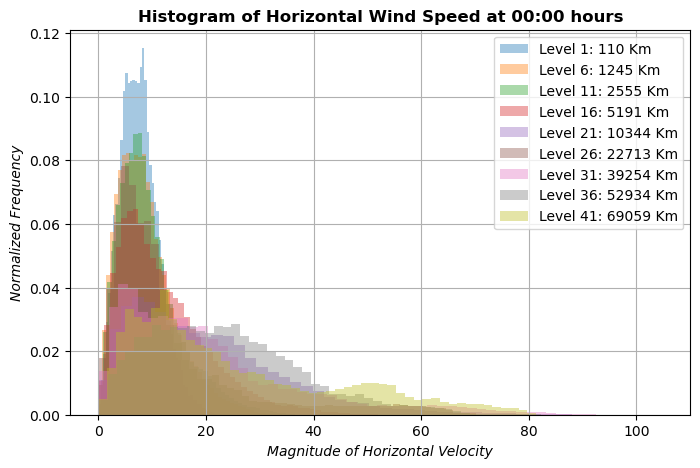

In [6]:
# Select the time index corresponding to 00:00 hours
jt = 0

# Extract U and V component data at 00:00 hours
U = myvars3D[jt, :, :, :, 1]  # U component (index 1)
V = myvars3D[jt, :, :, :, 2]  # V component (index 2)

# Calculate magnitude of horizontal velocity for each vertical level
horizontal_wind_speed = np.sqrt(U**2 + V**2)

# Plot histograms for the magnitude of horizontal velocity at each vertical level
plt.figure(figsize=(8, 5))
for level in range(0,Nlevs,5):
    # Flatten the data to create the histogram
    data = horizontal_wind_speed[level, :, :].flatten()
    
    # Plot histogram
    plt.hist(data, bins=50, alpha=0.4, label=f"Level {level+1}: {round(heights[level])} Km", density=True)

# Set plot labels and title
plt.xlabel('Magnitude of Horizontal Velocity', fontstyle='italic')
plt.ylabel('Normalized Frequency', fontstyle='italic')
plt.title('Histogram of Horizontal Wind Speed at 00:00 hours', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()


<br><p><h4> <b>Extra: GIF</b> </h4></p>

Generate a GIF that shows the evolution of a field throughout the day.

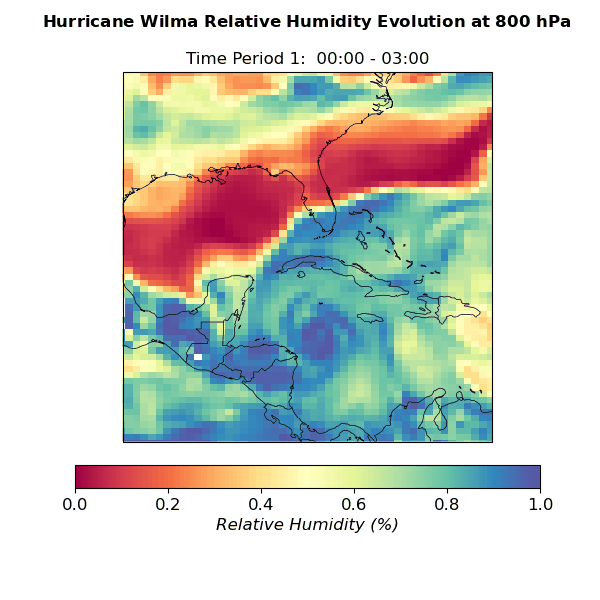

In [327]:
# Define variable index
jvar = 3 # Index corresponding to relative humidity in ncVar3D array

# List to store images
images = []

# Turn off interactive visualization
plt.ioff()

# Iterate to plot subplots and save each image
for jt in range(8):
    # Create subplot and axes
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Add geographical features
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    
    # Set the geographical extent of the subplot to focus on the area around La Habana
    ax.set_extent([hab_lon - dx, hab_lon + dx, hab_lat - dx, hab_lat + dx], crs=ccrs.PlateCarree())
    
    # Define normalization and colormap
    mynorm = plt.Normalize(vmin=0, vmax=1)  # Assuming relative humidity ranges from 0 to 1
    mycmap = plt.get_cmap('Spectral', 1000) 

    # Plot relative humidity data at 800 hPa elevation
    cax = ax.pcolormesh(lons, lats, myvars3D[jt,level_index_800hPa,:,:,jvar], cmap=mycmap, transform=ccrs.PlateCarree(), norm=mynorm)

    # Set title with the value of jt
    ax.set_title(f"$\mathbf{{Hurricane\ Wilma\ Relative\ Humidity\ Evolution\ at\ 800\ hPa}}$ \n\nTime Period {jt+1}:  {time_intervals[jt]}", fontsize=12)
    
    # Add colorbar
    cbar = fig.colorbar(cax, ax=ax, orientation='horizontal', pad=0.05)
    cbar.set_label('Relative Humidity (%)', fontstyle='italic', fontsize=12)
    cbar.ax.tick_params(labelsize=12)
    
    # Save each subplot as an image
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)

# Convert list of images to GIF
imageio.mimsave('wilma_RH.gif', images, fps=3, loop=0, verbose=False)

# Turn interactive visualization back on
plt.ion()

# Close the figure to free memory
plt.close(fig) 

# Display GIF using IPython
Image(filename="wilma_RH.gif")